<a href="https://colab.research.google.com/github/AstralGoGod/UChicagoPHYS131Labs/blob/main/Copy_of_Period_of_a_Pendulum_(Part_1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PERIOD OF A PENDULUM (Part 1)

*Last updated 10/5/2022*

This Google Colaboration notebook uses the programming language Python. You don't need to understand how to program in Python yourself to use this notebook. Instead, we will explain what each cell does and where you will need to make edits. Think of it as a **tool** that we'll use to do calculations and produce plots.

This particular cell is a **text** cell, but you'll notice that some of the cells below contain **code**. To exectute the code inside a cell, click the cell and press `shift+enter` or click the run icon that appears when hovering over the top-left corner of the cell. Run the cells wihin a section from top to bottom, stopping to read the notes before/after each cell to make sure you know what is going on.

Try it with the cell below! Execute it by pressing `shift+enter` (and selecting "Run Anyway" if a warning box pops up).

In [ ]:
print('Hello World')

Hello World


The sections below are broken up into different parts. Remember to run the parts from top to bottom.

*Note that if the cells below are collapsed, you can click the little triangle next to the header to expand the cells*.

# Preliminary cells
These cells load libraries and define some useful functions. Later when you have more time, you can look closely at the code and try to understand what it is doing, but for now you can just run the cells by clicking `shift+enter` and moving on. (There is no output.)

In [ ]:
# These lines load important libraries into memory
import numpy as np
from matplotlib import pyplot as plt

# Below are several functions we want to define
def average(x):
    sum = 0                  # initializes our running total to be zero and calls it "sum"
    for number in x:         # makes a loop over the list "x"
        sum = sum + number   # adds the current item in the list (called "number" to the running total (called "sum")
    return(sum / len(x))     # divides the total by the number of items in the list

def standard_deviation(x):
    avg = average(x)
    variance = 0                                # initializes our running total to be zero and calls it "variance"
    for number in x:                            # makes a loop over the list "x"
        variance = variance + (number - avg)**2 # adds the square of the difference between each item and the average
    return(np.sqrt(variance/(len(x)-1)))        # divides the total by N-1

def standard_error(x):
    return(standard_deviation(x))/np.sqrt(len(x)) # divides the standard deviation by sqrt of the number of points

def t_prime(A, dA, B, dB=0):               # Calculates the t_prime value between A +/- dA and B +/- B
    return((A-B)/np.sqrt(dA**2 + dB**2))   # If only 3 arguments are given, assumes dB = 0 (e.g. a literature value)

In [ ]:
# These lines control how our figures look
%matplotlib inline
plt.rcParams['figure.dpi'] = 160 #Change this value to make your picture bigger or smaller

# Dropping paper
You can use these cells to calculate the statistics for your paper drop times (mean, standard deviation and standard error) and then make a scatter plot to visualize the data.


The next cell contains a list of numbers inside square brackets. This will be where you enter your list of values for the measured drop times. **Edit** this cell to use your own times in units of *seconds*. Make sure that numbers are separated by commas and that the list is inside square brackets (e.g. `time = [1.0, 2.2, 3.8]`).



In [ ]:
times = [1.24,1.44,1.25,0.95,0.53,0.95,1.10,1.25,0.96,0.95]

Let's perform some calculations on your data.

In [ ]:
mean = average(times)
std_dev = standard_deviation(times)
std_err = standard_error(times)

print("Average fall time is {:0.2f} sec".format(mean))
print("Standard deviation is {:0.2f} sec".format(std_dev))
print("Standard error (SE) is {:0.2f} sec".format(std_err))

Average fall time is 1.06 sec
Standard deviation is 0.25 sec
Standard error (SE) is 0.08 sec


Finally, let's make a scatter plot of your data.

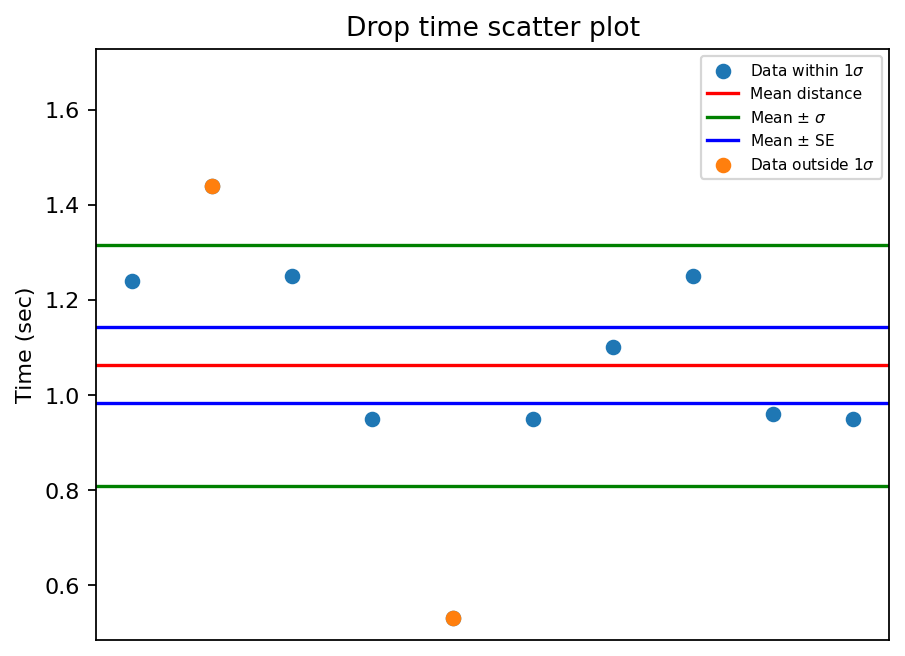

In [ ]:
index = np.linspace(1,len(times),len(times))
fig,ax = plt.subplots()
ax.scatter(index,times,label = "Data within 1$\sigma$")
ax.axhline(mean,color='r',label="Mean distance")
ax.axhline(mean+std_dev,color='g',label="Mean $\pm$ $\sigma$")
ax.axhline(mean-std_dev,color='g')
ax.axhline(mean+std_err,color='b',label="Mean $\pm$ SE")
ax.axhline(mean-std_err,color='b')

times = np.array(times)
outside_sigma = np.logical_or( times > mean+std_dev, times < mean-std_dev)
ax.scatter(index[outside_sigma], times[outside_sigma],
           label = "Data outside 1$\sigma$")

ax.set_title("Drop time scatter plot")
ax.set_ylabel("Time (sec)")
ax.set_ylim(top=1.2*max(times))
plt.xticks([])
ax.legend(fontsize="x-small")
plt.show()

Now save your image (right click and select "save image as") and put a copy in your lab notebook!

# Building a pendulum
You may now use this section to compute statistics and plot your period for your pendulum.

**Edit** the first line here by entering the length of the pendulum. The rest of the code will will calculate the predicted period.

In [ ]:
# L is the length of your pendulum (in meters)
L =

# T_predicted is the value of the period predicted from the formula (in seconds)
T_predicted = 2*np.pi*np.sqrt(L/9.81)

print("Predicted Period: T = ", T_predicted, "seconds")

Predicted Period: T =  1.193567530020791 seconds


Enter the list of measured periods for each angle you studied.

*If you measure at different angles than the ones listed below, follow the naming pattern. For example, if you measure at $8^{\circ}$, you can add a line of code* `T8 = [...]` *for the measured periods at that angle.*

In [ ]:
# T5 and T10 are lists of your measured periods of 5 and 10 degrees, respectively
T10 = []
T15 = []
T20 = []
T30 = []
T50 = []
T70 = []
T90 = []


print("periods at 10 degrees:", T10)
print("periods at 15 degrees:", T15)
print("periods at 20 degrees:", T20)
print("periods at 30 degrees:", T30)
print("periods at 50 degrees:", T50)
print("periods at 70 degrees:", T70)
print("periods at 90 degrees:", T90)

periods at 10 degrees: [1.2, 1.2, 1.18, 1.16, 1.25, 1.18]
periods at 15 degrees: [0.95, 1.05, 1.1, 1.11, 1.03, 1.0]
periods at 20 degrees: [1.1, 1.15, 1.06, 1.2, 1.21, 1.21]
periods at 30 degrees: [1.13, 1.16, 1.08, 1.21, 1.05, 1.15]
periods at 50 degrees: [1.16, 1.08, 1.25, 1.09, 1.03, 1.13]
periods at 70 degrees: [1.26, 1.16, 1.16, 1.18, 1.23, 1.17]
periods at 90 degrees: [1.15, 1.27, 1.18, 1.23, 1.16, 1.25]


Next, compute the average and standard error for these two lists of data.

*Again, if you measured at different angles, use the naming pattern to add the appropriate lines of code.*

In [ ]:
avg10 = average(T10)
avg15 = average(T15)
avg20 = average(T20)
avg30 = average(T30)
avg50 = average(T50)
avg70 = average(T70)
avg90 = average(T90)

davg10 = standard_error(T10)
davg15 = standard_error(T15)
davg20 = standard_error(T20)
davg30 = standard_error(T30)
davg50 = standard_error(T50)
davg70 = standard_error(T70)
davg90 = standard_error(T90)

print("T_10 = ", avg10, "+/-", davg10)
print("T_15 = ", avg15, "+/-", davg15)
print("T_20 = ", avg20, "+/-", davg20)
print("T_30 = ", avg30, "+/-", davg30)
print("T_50 = ", avg50, "+/-", davg50)
print("T_70 = ", avg70, "+/-", davg70)
print("T_90 = ", avg90, "+/-", davg90)

T_10 =  1.195 +/- 0.012583057392117928
T_15 =  1.04 +/- 0.024765567494675636
T_20 =  1.155 +/- 0.0259165326899002
T_30 =  1.13 +/- 0.023523038352503117
T_50 =  1.1233333333333333 +/- 0.03116265571338731
T_70 =  1.1933333333333334 +/- 0.01706197852275965
T_90 =  1.2066666666666668 +/- 0.020439612955674546


Next, we can plot the data against the predicted value.

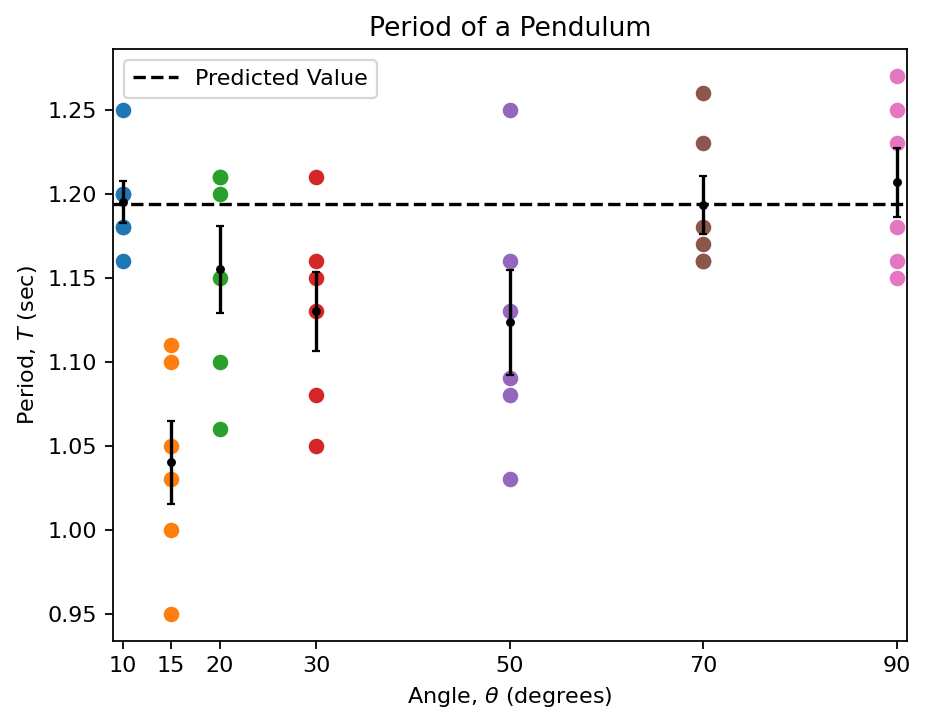

In [ ]:
plt.figure()
plt.axhline(T_predicted, color = 'black', linestyle='--', label='Predicted Value')
plt.plot(10*np.ones(len(T10)), T10, 'o')
plt.plot(15*np.ones(len(T15)), T15, 'o')
plt.plot(20*np.ones(len(T20)), T20, 'o')
plt.plot(30*np.ones(len(T30)), T30, 'o')
plt.plot(50*np.ones(len(T50)), T50, 'o')
plt.plot(70*np.ones(len(T70)), T70, 'o')
plt.plot(90*np.ones(len(T90)), T90, 'o')
plt.errorbar([10,15,20,30,50,70,90], [avg10,avg15,avg20, avg30,avg50,avg70,avg90], [davg10,davg15, davg20,davg30,davg50,davg70,davg90], fmt = 'k.', capsize=2)
plt.xlabel("Angle, $\\theta$ (degrees)")
plt.ylabel("Period, $T$ (sec)")
plt.title("Period of a Pendulum")
plt.xlim([9, 91])
plt.xticks([10,15,20,30,50,70,90])
plt.legend()
plt.show()

Finally, we check the $t^{\prime}$ value at each angle to see if we have agreement with the predicted value.

In [ ]:
std_dev10 = standard_deviation(T10)
std_dev15 = standard_deviation(T15)
std_dev20 = standard_deviation(T20)
std_dev30 = standard_deviation(T30)
std_dev50 = standard_deviation(T50)
std_dev70 = standard_deviation(T70)
std_dev90 = standard_deviation(T90)

std_err10 = standard_error(T10)
std_err15 = standard_error(T15)
std_err20 = standard_error(T20)
std_err30 = standard_error(T30)
std_err50 = standard_error(T50)
std_err70 = standard_error(T70)
std_err90 = standard_error(T90)

print("Standard deviation at 10 Degrees is {:0.2f} sec".format(std_dev10))
print("Standard deviation at 15 Degrees is {:0.2f} sec".format(std_dev15))
print("Standard deviation at 20 Degrees is {:0.2f} sec".format(std_dev20))
print("Standard deviation at 30 Degrees is {:0.2f} sec".format(std_dev30))
print("Standard deviation at 50 Degrees is {:0.2f} sec".format(std_dev50))
print("Standard deviation at 70 Degrees is {:0.2f} sec".format(std_dev70))
print("Standard deviation at 90 Degrees is {:0.2f} sec".format(std_dev90))

print("Standard error (SE) at 10 Degrees is {:0.2f} sec".format(std_err10))
print("Standard error (SE) at 15 Degrees is {:0.2f} sec".format(std_err15))
print("Standard error (SE) at 20 Degrees is {:0.2f} sec".format(std_err20))
print("Standard error (SE) at 30 Degrees is {:0.2f} sec".format(std_err30))
print("Standard error (SE) at 50 Degrees is {:0.2f} sec".format(std_err50))
print("Standard error (SE) at 70 Degrees is {:0.2f} sec".format(std_err70))
print("Standard error (SE) at 90 Degrees is {:0.2f} sec".format(std_err90))

print("For 10 degrees, t' =", t_prime(avg10, davg10, T_predicted))
print("For 15 degrees, t' =", t_prime(avg15, davg15, T_predicted))
print("For 20 degrees, t' =", t_prime(avg20, davg20, T_predicted))
print("For 30 degrees, t' =", t_prime(avg30, davg30, T_predicted))
print("For 50 degrees, t' =", t_prime(avg50, davg50, T_predicted))
print("For 70 degrees, t' =", t_prime(avg70, davg70, T_predicted))
print("For 90 degrees, t' =", t_prime(avg90, davg90, T_predicted))

Standard deviation at 10 Degrees is 0.03 sec
Standard deviation at 15 Degrees is 0.06 sec
Standard deviation at 20 Degrees is 0.06 sec
Standard deviation at 30 Degrees is 0.06 sec
Standard deviation at 50 Degrees is 0.08 sec
Standard deviation at 70 Degrees is 0.04 sec
Standard deviation at 90 Degrees is 0.05 sec
Standard error (SE) at 10 Degrees is 0.01 sec
Standard error (SE) at 15 Degrees is 0.02 sec
Standard error (SE) at 20 Degrees is 0.03 sec
Standard error (SE) at 30 Degrees is 0.02 sec
Standard error (SE) at 50 Degrees is 0.03 sec
Standard error (SE) at 70 Degrees is 0.02 sec
Standard error (SE) at 90 Degrees is 0.02 sec
For 10 degrees, t' = 0.11384117027919524
For 15 degrees, t' = -6.200848418022588
For 20 degrees, t' = -1.4881438995819456
For 30 degrees, t' = -2.7023520120234332
For 50 degrees, t' = -2.2537936860524233
For 70 degrees, t' = -0.013726232696009871
For 90 degrees, t' = 0.6408700925150861
